In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

Below is the Python code for using St. Laurent et al.'s 2003 knife-edge model of internal tide generation. We begin with a brief explanation of their theory. For more details, see their paper.

Consider a knife-edge ridge of height $h_0$ at $x=0$ in an ocean of uniform depth $H$.



<img src="./figs/KnifeEdge.png" alt="KnifeEdge" class="bg-primary mb-1" width="500px">

Fig. 1 in St. Laurent et al., 2003, a sketch of a knife-edge ridge.




A barotropic tidal current $U(t)=U_0\cos \omega t$. Matching conditions for the modal solutions:

\begin{aligned}
& u_1=U_0 \sum_{n=1}^{\infty} a_n \cos \left(\frac{n \pi z}{H}\right) \cos \left(k_n x+\omega t\right), \\
& u_2=U_0 \sum_{n=1}^{\infty} b_n \cos \left(\frac{n \pi z}{H}\right) \cos \left(-k_n x+\omega t\right), \\
& w_1=\alpha U_0 \sum_{n=1}^{\infty} a_n \sin \left(\frac{n \pi z}{H}\right) \sin \left(k_n x+\omega t\right), \\
& w_2=-\alpha U_0 \sum_{n=1}^{\infty} b_n \sin \left(\frac{n \pi z}{H}\right) \sin \left(-k_n x+\omega t\right),
\end{aligned}
, where $a_n$ and $b_n$ are the nondimensional coefficients of the modal series, $n\pi/H$ are vertical wavenumbers, and $k_n$ are horizontal wavenumbers.

The boundary conditions are
\begin{aligned}
& w(z=0)=0 \\
& w(z=-H)=0.
\end{aligned}

The modal coefficients are obtained through matching conditions at $x=0$,

\begin{aligned}
& w_1=w_2, \quad-H+h_0 \leqslant z \leqslant 0, \\
& u_1+U=u_2+U, \quad-H+h_0 \leqslant z \leqslant 0, \\
& u_1+U=0, \quad-H \leqslant z<-H+h_0, \\
& u_2+U=0, \quad-H \leqslant z<-H+h_0 .
\end{aligned}

From three matching conditions of $u$, showing
\begin{equation*}
\sum_{n=1}^{\infty} a_n \cos \frac{n \pi z}{H}=\sum_{n=1}^{\infty} b_n \cos \frac{n \pi z}{H}, \quad-H \leqslant z \leqslant 0 .
\end{equation*}
And the orthogonality of cosines, so this implies $a_n=b_n$.
So all the matching conditions would be merged into two.
\begin{equation*}
\begin{aligned}
&\sum_{n=1}^{\infty} a_n \sin \frac{n \pi z}{H}=0, \quad-H+h_0 \leqslant z \leqslant 0\\
&\sum_{n=1}^{\infty} a_n \cos \frac{n \pi z}{H}=-1, \quad-H \leqslant z<-H+h_0 .
\end{aligned}
\end{equation*}
This equation set can be solved by multiplying $cos m\pi z/H$:
\begin{equation*}
\sum_{n=1}^{\infty} a_n\left(\int_{-H}^{-H+h_0} \cos \frac{n \pi z}{H} \cos \frac{m \pi z}{H} \mathrm{~d} z\right.
\left.+\int_{-H+h_0}^0 \sin \frac{n \pi z}{H} \cos \frac{m \pi z}{H} \mathrm{~d} z\right)
=-\int_{-H}^{-H+h_0} \cos \frac{m \pi z}{H} \mathrm{~d} z .
\end{equation*}
In practice, this summation over a finite number of modes, $n=1,2,\ldots N$, can be written in matrix form for $m=0,1,2,\ldots, N-1$ as
\begin{equation*}
A_{mn}a_n=c_m
\end{equation*}
, where

\begin{equation*}
\begin{aligned}
A_{m n}= & \frac{n \sin n \pi(1-\delta) \cos m \pi(1-\delta)-m \cos n \pi(1-\delta) \sin m \pi(1-\delta)}{\left(m^2-n^2\right)} \\
& +\frac{n-n \cos n \pi(1-\delta) \cos m \pi(1-\delta)-m \sin n \pi(1-\delta) \sin m \pi(1-\delta)}{\left(m^2-n^2\right)}
\end{aligned}
\end{equation*}

and 

\begin{equation*}
c_m=\frac{\sin m \pi(1-\delta)}{m}.
\end{equation*}

When $m=n$, $A_{mn}$ is singular. So after re-evaluating the integrals, setting $m=n$, giving

\begin{equation*}
A_{n n}=\frac{n \pi \delta-\sin n \pi(1-\delta) \cos n \pi(1-\delta)-\sin ^2 n \pi(1-\delta)}{2 n}
\end{equation*}

Also, when $m=0$, $c_m$ is singular. Re-evaluate again by setting $m=0$, yielding

\begin{equation*}
c_0=-\pi\delta
\end{equation*}

Thus, we can get the modal amplitude by
\begin{equation*}
a_n=A_{mn}^{-1}c_m
\end{equation*}

For the depth-integrated energy flux is 

\begin{equation*}
F_{knife}=\int^0_{-H} \langle p'u' \rangle dz=F_0 \sum_{n=1}^{\infty}n^{-1}a_n^2
\end{equation*}
, where $F_0$ is the energy flux amplitude in the limit of $\epsilon<<1$ (Llewellyn Smith and Young, 2002)
\begin{equation*}
F_0=\frac{1}{2 \pi} \rho \frac{\left(\left(N^2-\omega^2\right)\left(\omega^2-f^2\right)\right)^{1 / 2}}{\omega} U_0^2 H^2
\end{equation*}


### Nondimensional energy flux
Here we reproduce St. Laurent et al., (2003)'s Fig. 3 and extend to other delta.

Text(0, 0.5, '$F_{knife}/F_0$')

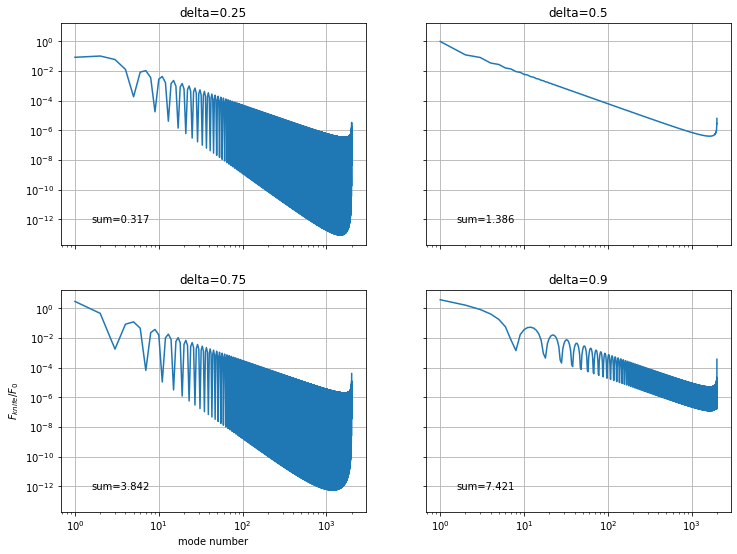

In [2]:
import KnifeEdge

nmodes=2000
n=np.arange(1,nmodes+1)

Delta=[0.25,0.5,0.75,0.9]

fig, axes = plt.subplots(2,2,figsize=(12,9),sharey=True,sharex=True)
axes=axes.flatten()

for delta, ax in zip(Delta,axes):

    an,Fn = KnifeEdge.knifeedge(delta,nmodes)
    ax.plot(n,Fn)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.text(0.1,0.1,'sum=%.3f'%np.sum(Fn),transform=ax.transAxes,size=10)
    ax.set_title('delta=%s'%delta)
    ax.grid()
    
axes[2].set_xlabel('mode number')
axes[2].set_ylabel('$F_{knife}/F_0$')

Text(0, 0.5, 'cumulative F')

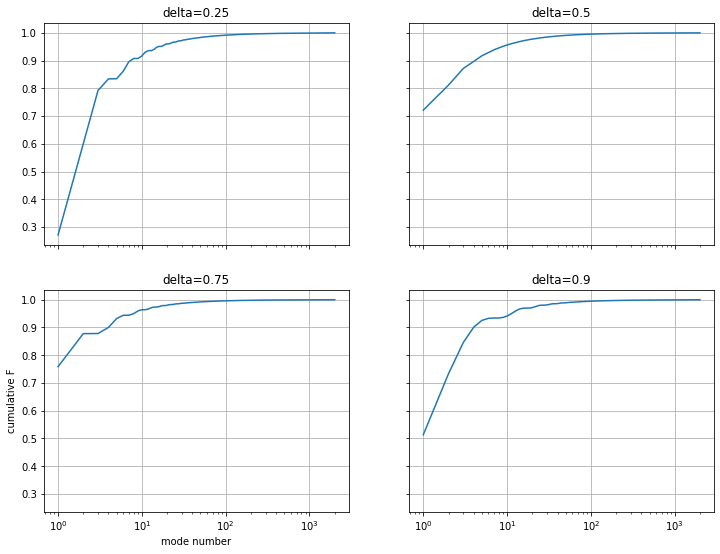

In [3]:
Delta=[0.25,0.5,0.75,0.9]

fig, axes = plt.subplots(2,2,figsize=(12,9),sharey=True,sharex=True)
axes=axes.flatten()

for delta, ax in zip(Delta,axes):

    an,Fn = KnifeEdge.knifeedge(delta,nmodes)
    ax.plot(n,np.cumsum(Fn)/np.sum(Fn))
    ax.set_xscale('log')
    ax.set_title('delta=%s'%delta)
    ax.grid()
    
axes[2].set_xlabel('mode number')
axes[2].set_ylabel('cumulative F')

### Modal partition of energy flux over delta
Here we reproduce St. Laurent et al., (2003)'s Fig. 14 and extend to other modes.

Text(0, 0.5, '$\\%$')

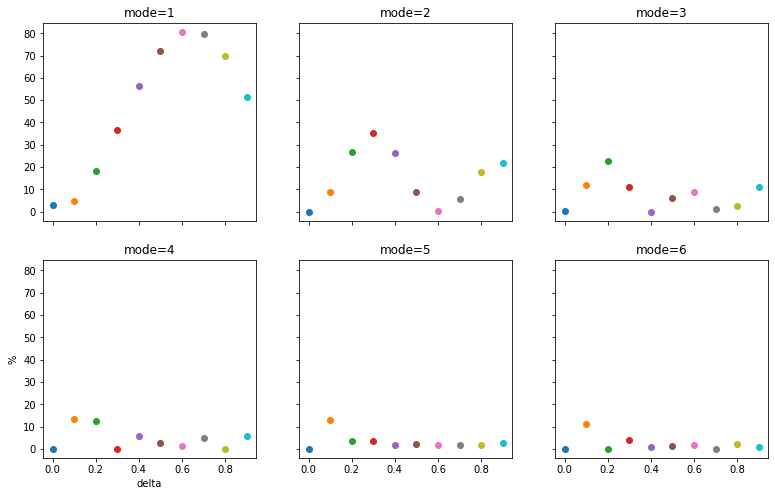

In [4]:
fig, axes = plt.subplots(2,3,figsize=(13,8),sharey=True,sharex=True)
axes=axes.flatten()
nm_show=range(1,7)
Delta=np.arange(0,1,0.1)

for nm, ax in zip(nm_show,axes):
    for delta in Delta:
        an,Fn = KnifeEdge.knifeedge(delta,nmodes)
        ax.plot(delta,Fn[nm-1]/np.sum(Fn)*100,marker='o')
        ax.set_title('mode=%s'%nm)
    
axes[3].set_xlabel('delta')
axes[3].set_ylabel('$\%$')

### Total energy flux over delta

Text(0, 0.5, 'total $F_{knife}/F_0$')

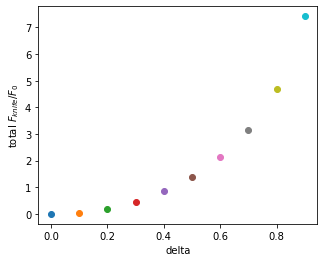

In [5]:
fig, ax = plt.subplots(figsize=(5,4))
Delta=np.arange(0,1,0.1)

for delta in Delta:
    an,Fn = KnifeEdge.knifeedge(delta,nmodes)
    ax.plot(delta,np.sum(Fn),marker='o')
    ax.grid()
    
ax.set_xlabel('delta')
ax.set_ylabel('total $F_{knife}/F_0$')

### Modal spatial structure
Here we make the snapshot of the baroclinic velocity under two different $\delta$. First one is $\delta=0.75$ so figure is like Fig. 2 of St. Laurent (2003). Second one we choose when $\delta=0.35$. 

In [6]:
delta=0.75 #relative height
an,Fn = KnifeEdge.knifeedge(delta,nmodes)

H=200      # water depth  
alpha=0.3  # internal wave slope
Lx=1/alpha*H
dx=np.floor(Lx/40)
dz=H/50
z=np.array([np.arange(0,-H,-dz)]).T
x1=np.arange(0,1.5*Lx,dx)[np.newaxis]
x2=np.arange(-1.5*Lx,1,dx)[np.newaxis]

u1=np.zeros((len(z),np.shape(x1)[-1],nmodes)) #x>0 side
u2=np.zeros((len(z),np.shape(x2)[-1],nmodes)) #x<0 side

for i in range(nmodes):
    u1[:,:,i]=an[i]*np.cos((i+1)*np.pi*(z)/H)*np.cos(alpha*(i+1)*np.pi/H*x1) #x>0 side  #(6)
    u2[:,:,i]=an[i]*np.cos((i+1)*np.pi*(z)/H)*np.cos(-alpha*(i+1)*np.pi/H*x2) #x<0 side

Text(0.5, 0.98, 'delta=0.75')

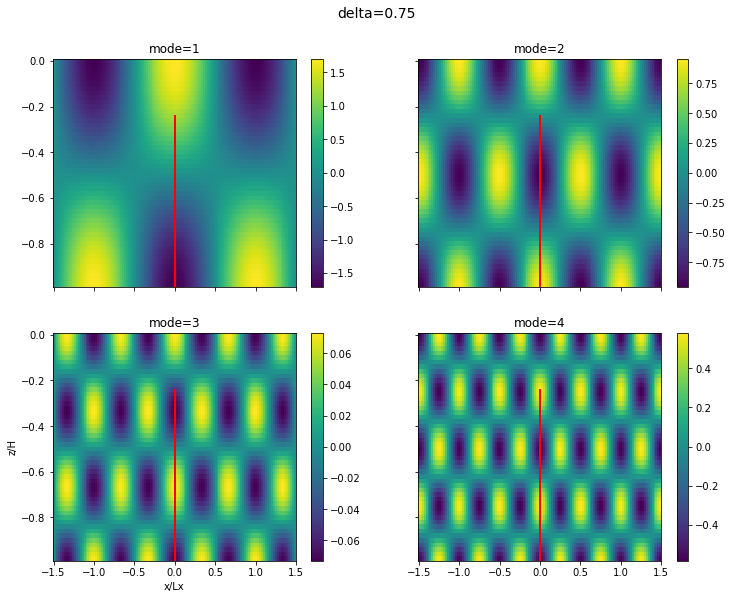

In [7]:
fig, axes = plt.subplots(2,2,figsize=(12,9),sharey=True,sharex=True)
axes=axes.flatten()

nm_show=[1,2,3,4]

for nm, ax in zip(nm_show,axes):
    ax.pcolormesh(x1*alpha/H,z/H,u1[:,:,nm-1])
    pcm=ax.pcolormesh(x2*alpha/H,z/H,u2[:,:,nm-1])
    ax.axvline(x=0,ymin=0, ymax=delta, color='r',lw=2)
    ax.set_title('mode=%s'%nm)
    plt.colorbar(pcm,ax=ax)

axes[2].set_xlabel('x/Lx')
axes[2].set_ylabel('z/H')
plt.subplots_adjust(top=0.9)
fig.suptitle('delta=%s'%delta, fontsize=14)

We can see different modes are preferred (amplitude is bigger) due to the height of the ridge.

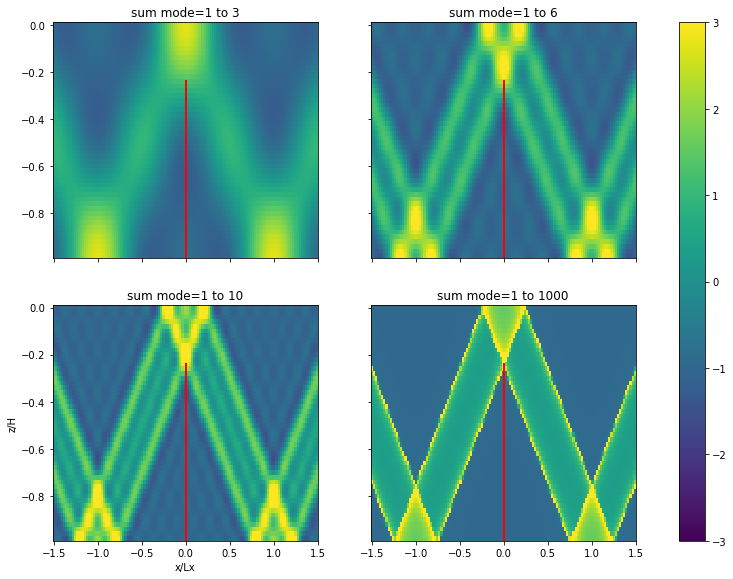

In [8]:
fig, axes = plt.subplots(2,2,figsize=(12,9),sharey=True,sharex=True)
axes=axes.flatten()

nm_show=[3,6,10,1000]

for nm, ax in zip(nm_show,axes):
    ax.pcolormesh(x1*alpha/H,z/H,np.sum(u1[:,:,:nm],axis=2),vmax=3,vmin=-3)
    pcm=ax.pcolormesh(x2*alpha/H,z/H,np.sum(u2[:,:,:nm],axis=2),vmax=3,vmin=-3)
    ax.axvline(x=0,ymin=0, ymax=delta, color='r',lw=2)
    ax.set_title('sum mode=1 to %s'%nm)


axes[2].set_xlabel('x/Lx')
axes[2].set_ylabel('z/H')
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.03, 0.8])
plt.colorbar(pcm,cax=cax)

We also can see the more modes are superpositioned the clearer the beams are.

In [9]:
delta=0.35 #relative height
an,Fn = KnifeEdge.knifeedge(delta,nmodes)

H=200      # water depth  
alpha=0.3  # internal wave slope
Lx=1/alpha*H
dx=np.floor(Lx/40)
dz=H/50
z=np.array([np.arange(0,-H,-dz)]).T
x1=np.arange(0,1.5*Lx,dx)[np.newaxis]
x2=np.arange(-1.5*Lx,1,dx)[np.newaxis]

u1=np.zeros((len(z),np.shape(x1)[-1],nmodes)) #x>0 side
u2=np.zeros((len(z),np.shape(x2)[-1],nmodes)) #x<0 side

for i in range(nmodes):
    u1[:,:,i]=an[i]*np.cos((i+1)*np.pi*(z)/H)*np.cos(alpha*(i+1)*np.pi/H*x1) #x>0 side  #(6)
    u2[:,:,i]=an[i]*np.cos((i+1)*np.pi*(z)/H)*np.cos(-alpha*(i+1)*np.pi/H*x2) #x<0 side

Text(0.5, 0.98, 'delta=0.35')

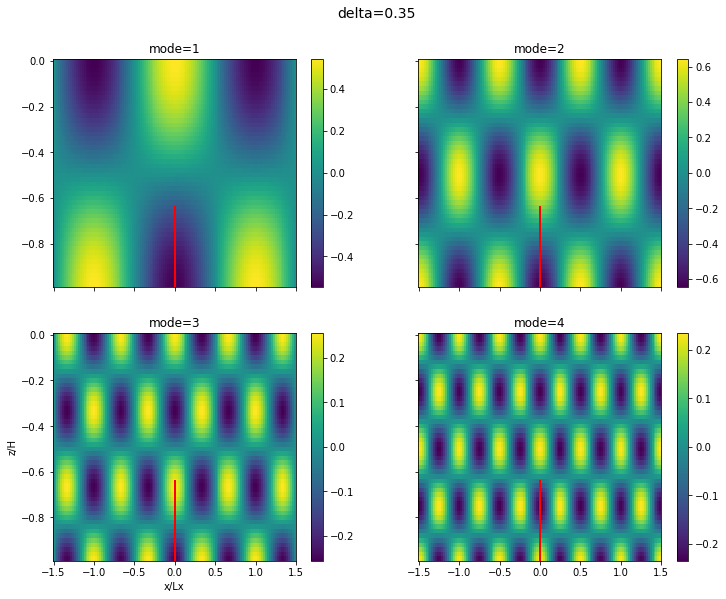

In [10]:
fig, axes = plt.subplots(2,2,figsize=(12,9),sharey=True,sharex=True)
axes=axes.flatten()

nm_show=[1,2,3,4]

for nm, ax in zip(nm_show,axes):
    ax.pcolormesh(x1*alpha/H,z/H,u1[:,:,nm-1])
    pcm=ax.pcolormesh(x2*alpha/H,z/H,u2[:,:,nm-1])
    ax.axvline(x=0,ymin=0, ymax=delta, color='r',lw=2)
    ax.set_title('mode=%s'%nm)
    plt.colorbar(pcm,ax=ax)

axes[2].set_xlabel('x/Lx')
axes[2].set_ylabel('z/H')
plt.subplots_adjust(top=0.9)
fig.suptitle('delta=%s'%delta, fontsize=14)

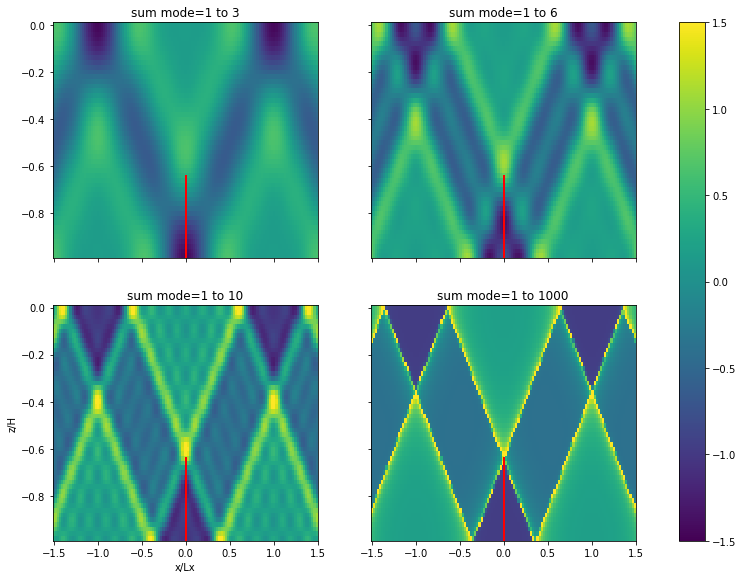

In [11]:
fig, axes = plt.subplots(2,2,figsize=(12,9),sharey=True,sharex=True)
axes=axes.flatten()

nm_show=[3,6,10,1000]

for nm, ax in zip(nm_show,axes):
    ax.pcolormesh(x1*alpha/H,z/H,np.sum(u1[:,:,:nm],axis=2),vmax=1.5,vmin=-1.5)
    pcm=ax.pcolormesh(x2*alpha/H,z/H,np.sum(u2[:,:,:nm],axis=2),vmax=1.5,vmin=-1.5)
    ax.axvline(x=0,ymin=0, ymax=delta, color='r',lw=2)
    ax.set_title('sum mode=1 to %s'%nm)


axes[2].set_xlabel('x/Lx')
axes[2].set_ylabel('z/H')
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.03, 0.8])
plt.colorbar(pcm,cax=cax)